## Acerca del conjunto de datos

* Contenido

El propietario de un supermercado a través de las tarjetas de socio, dispone de algunos datos básicos sobre sus clientes, como el ID de cliente, la edad, el sexo, los ingresos anuales y la puntuación de gasto.
La puntuación de gasto es algo que se asigna al cliente en función de los parámetros definidos, como el comportamiento del cliente y los datos de compra.

* Planteamiento del problema

Se desea conocer a los clientes que pueden converger fácilmente [clientes objetivo] para poder dar una idea al equipo de marketing y planificar la estrategia en consecuencia.

#### Las variables: 

* CustomerID: Unique ID assigned to the customerCustomerID
* Gender: Gender of the customer
* Age: Age of the custome
* Annual Income (k$): Annual Income of the custome
* Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature

## Segmentación y análisis de clientes (Pasos para resolución del problemas): 

* Importación de bibliotecas.
* Exploración de datos.
* Visualización de datos.
* Manejo de valores atípicos.
* Transformación de variables.
* Modelado, Insights y Validación.

## 1. Importación de Librerias

In [761]:
# Importamos librerias que es de uso en casi todo proyecto DataScience
import pandas as pd
import numpy as np
from numpy import mean, std
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## 2. Exploración de Datos

In [762]:
with open("Mall_Customers.csv", encoding= 'latin1') as f:
    for _ in range(3): 
        print(f.readline())

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)

1,Male,19,15,39

2,Male,21,15,81



In [763]:
#  Cargamos en archivo CSV en un objeto DataFrame
data = pd.read_csv("Mall_Customers.csv")
data.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [764]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [765]:
# Eliminamos la variales CustomerID
data.drop('CustomerID', axis = 1, inplace=True)

In [766]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


* Age (Edad):
Rango: 18 a 70
Media: Alrededor de 38.85
Desviación estándar: Alrededor de 13.97:

* Annual Income (Ingreso Anual):
Rango: 15 a 137
Media: Alrededor de 60.56
Desviación estándar: Alrededor de 26.26

* Spending Score (Puntuación de Gasto):
Rango: 1 a 99
Media: Alrededor de 50.2
Desviación estándar: Alrededor de 25.82

Dado que los datos tienen diferente escalas y rango, la normalización o estandarización podria mejorar el desempeño del modelo, se explorar mas adelante alternativas.

## 3. Vizualización

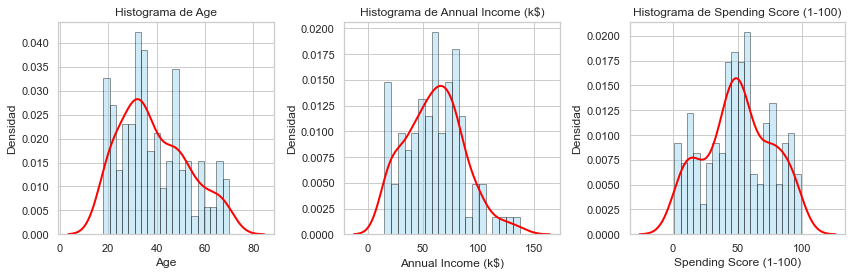

In [767]:
# Variables numericas

plt.figure(figsize=(12, 4))
n = 0

for variable in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n) 
    sns.distplot(data[variable], bins=20, color='skyblue', kde=True, hist_kws={'edgecolor': 'black'}, 
                 kde_kws={'linewidth': 2}).lines[0].set_color('red')
    plt.title('Histograma de {}'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

In [768]:
from scipy.stats import skew

variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# Un valor de 0 indica simetría, un valor negativo indica asimetría negativa, 
# y un valor positivo indica asimetría positiva.

for index, col in enumerate(variables):
    print(col, skew(data[col]))

Age 0.48191947090957177
Annual Income (k$) 0.319423684276314
Spending Score (1-100) -0.04686530945553505


Valores típicos de la medida de simetría, donde:
- **Simetría = 0:** La distribución es simétrica.
- **Simetría > 0:** Asimetría positiva (cola derecha).
- **Simetría < 0:** Asimetría negativa (cola izquierda).

Text(0.5, 1.0, 'Spending Score (1-100)')

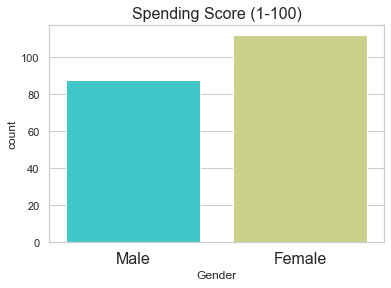

In [769]:
# Variable Categorica

sns.countplot(x='Gender', data=data, palette="rainbow")
plt.xticks(fontname="Arial", fontsize=16)
plt.title(col, fontsize = 16)

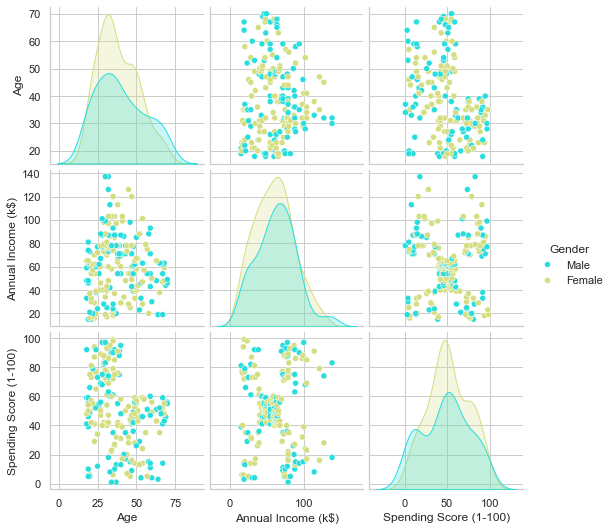

In [770]:
# Vision general de como se distribui las variables en relación al genero
sns.pairplot(data, hue= 'Gender', palette= "rainbow")

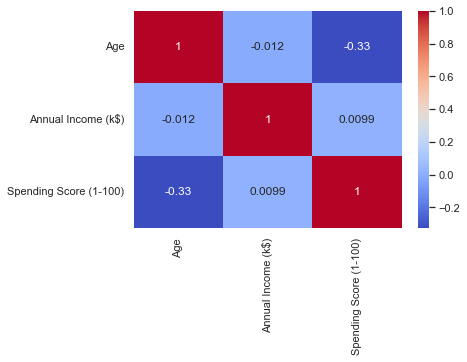

In [771]:
import seaborn as sns
corr_matrix = data.select_dtypes(np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

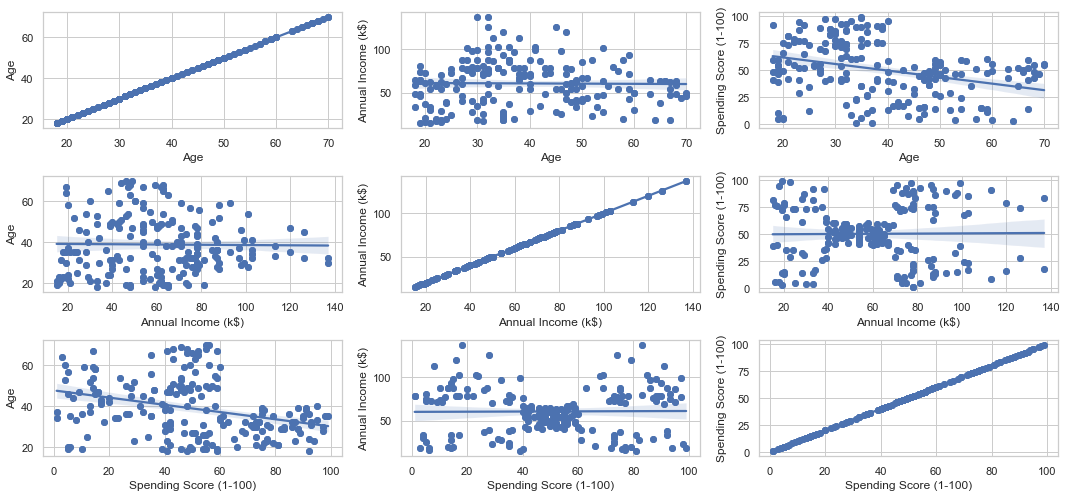

In [772]:
plt.figure(figsize=(15, 7))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        sns.regplot(x=x, y=y, data=data)
        plt.scatter(data[x], data[y])
        
        # Etiqueta del eje x para la última fila
        if n in [7, 8, 9]:
            plt.xlabel(x)

plt.tight_layout()
plt.show()


## 4. Manejo de valore atípicos

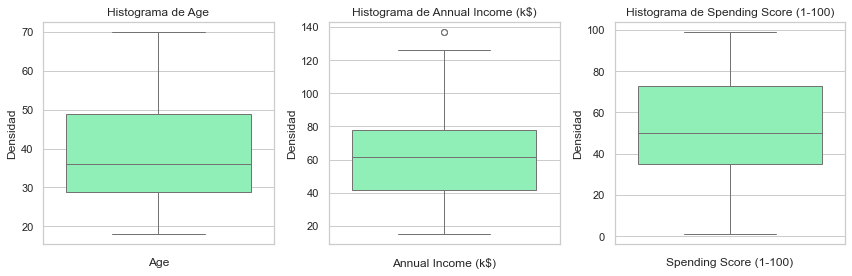

In [773]:
# Variables numericas

plt.figure(figsize=(12, 4))
sns.set_theme(style="whitegrid")
n = 0

for variable in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n) 
    sns.boxplot(y=data[variable], palette="rainbow")
    plt.title('Histograma de {}'.format(variable))
    plt.xlabel(variable)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

## 5. Transformación de variables

* Transformación de variables categóricas en numericas.

Convertiremos las variables de tipo categorica a variables numericas binaria donde 1 puede representar "Female" , y 0 puede representar "Male". Esto facilita la manipulación de la variable y su uso en modelos predictivos.

In [774]:
data['Gender'] = data['Gender'].map({"Male": 0, "Female": 1})

* Transformación de variables para mejorar la simetría o normalidad.

In [775]:
variables = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson')
data[variables] = power_transformer.fit_transform(data[variables])

In [776]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
data[variables] = scaler_minmax.fit_transform(data[variables])


In [777]:
# from sklearn.preprocessing import StandardScaler

# scaler_standard = StandardScaler()
# data[variables] = scaler_standard.fit_transform(data[variables])

### Resultado Escalador:
En relación al proceso de normalización, hemos explorado varias combinaciones, como mejorar la asimetría mediante Power Transform junto con un escalador, así como también experimentar con cada uno de ellos de manera individual. La combinación que ha proporcionado los mejores resultados ha sido la mejora de la asimetría con Power Transform, seguida de la escala mediante MinMaxScaler.

## 6. Modelado, Insights y Validación

1. Silhouette Score: 0.00587
   - Podría indicar que los clusters no están bien definidos y que los puntos están cerca de la frontera entre dos o más clusters.

2. Davies-Bouldin Index: 21.1452
   -  Un valor de 21.1452 sugiere una dispersión considerable entre los clusters.

3. Calinski-Harabasz Index: 0.3760
   - Indica que la partición tiene una separación limitada entre los clusters. Esto sugiere que los clusters están más cercanos entre sí o que la variabilidad dentro de cada cluster es alta en comparación con la variabilidad entre clusters.

En conjunto, estas métricas sugieren que la calidad del clustering podría no ser óptima. 

Las metricas que se usaran para evaluar el modelo de clustering:

**Silhouette Score:**
   - Un valor de silueta cercano a 1 indica que las muestras están bien asignadas a sus clusters y están relativamente alejadas de los clusters vecinos.

**Davies-Bouldin Index:**
   - El índice Davies-Bouldin mide la dispersión entre los clusters. Un valor más bajo indica una mejor partición.

**Calinski-Harabasz Index:**
   - El índice Calinski-Harabasz mide la relación entre la dispersión dentro de los clusters y la dispersión entre los clusters. Un valor más alto indica una mejor partición.

### 1ª Segmentación: Ingreso anual y Pontuación de gasto

### 1.1 Modelo

In [778]:
# Ahora tengo 3 DataFrames para medir el desempeño
# data, data_MinMax,  data_standard
# Foco en Características Importantes: Annual Income y Spending 
X = data[['Annual Income (k$)', 'Spending Score (1-100)']] 

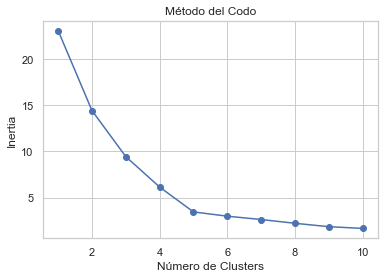

In [779]:
from sklearn.cluster import KMeans
# Vamos a probar diferentes números de clusters, por ejemplo, de 1 a 10
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()


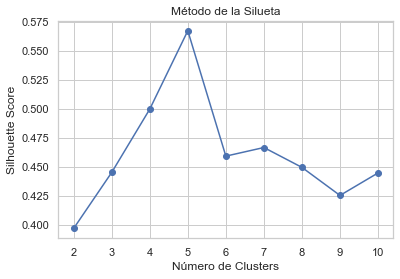

In [780]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar el método de la silueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Aquí hemos probado dos métodos para seleccionar el número óptimo de clusters (k): el método del codo y el método de la silueta. Dado que ambos métodos han arrojado los mismos resultados, continuaremos utilizando el método de la silueta en los demás modelos.

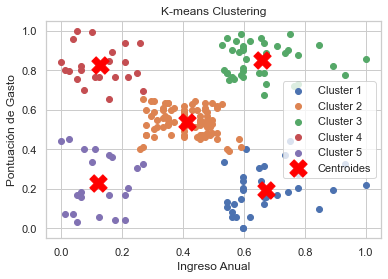

In [781]:
# Número de clusters que deseas
num_clusters = 5

# Inicializar el modelo K-means
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Ajustar el modelo a los datos
kmeans.fit_predict(X)


# Agregar las etiquetas de cluster al conjunto de datos original
data['Cluster'] = kmeans.labels_

# Visualización de los clusters
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Ingreso Anual')
plt.ylabel('Pontuación de Gasto')
plt.title('K-means Clustering')
plt.legend()
plt.show()


### 1.2 Insights

* Cluster 1 -> gana mucho, pero gasta poco
* Cluster 2 -> ingresos y gastos medios 
* Cluster 3 -> gana mucho y gasta mucho 
* Cluster 4 -> gana poco y gasta mucho 
* Cluster 5 -> Gana poco y gasta poco 

Grupos objetivos: 3 y 4

### 1.3 Validación

In [782]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
silhouette_avg = silhouette_score(X, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)

print("Silhouette Score:", silhouette_avg, '\nDavies Bouldin:', davies_bouldin, '\nCalinski Harabasz:', calinski_harabasz )

Silhouette Score: 0.567213526156105 
Davies Bouldin: 0.5591380696150537 
Calinski Harabasz: 277.7016304588815


1. Silhouette Score: 0.5672
   - Sugiere una buena asignación de los puntos a los clusters.

2. Davies-Bouldin Index: 0.5591
   -  Sugiere que la dispersión entre los clusters es relativamente baja, lo cual es positivo.

3. Calinski-Harabasz Index: 277.7016
   - Sugiere que la partición tiene una buena separación entre los clusters.

Estas métricas, en conjunto, sugieren que la calidad del clustering es moderada.

### 2ª Segmentación: Edad  y Pontuación de gasto

### 2.1 El modelo

In [783]:
Y = data[['Age', 'Spending Score (1-100)']] 

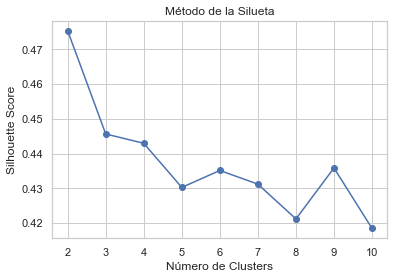

In [784]:
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0 )
    kmeans.fit(Y)
    silhouette_avg = silhouette_score(Y, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar el método de la silueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

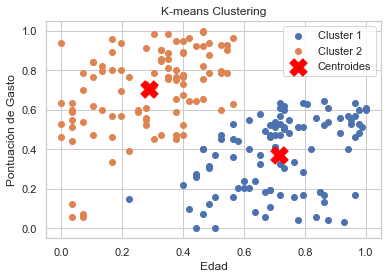

In [785]:
# Número de clusters que deseas
num_clusters = 2

# Inicializar el modelo K-means
kmeans = KMeans(n_clusters=num_clusters,  init='k-means++', random_state=0)

# Ajustar el modelo a los datos
kmeans.fit_predict(Y)


# Agregar las etiquetas de cluster al conjunto de datos original
data['Cluster'] = kmeans.labels_

# Visualización de los clusters
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Edad')
plt.ylabel('Pontuación de Gasto')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### 2.2 Insights

Los datos sugieren que los individuos más jóvenes tienden a gastar más que los mayores. Es plausible que se identifiquen con el grafico anterior con dos grupos específicos (1 y 4): uno conformado por jóvenes con ingresos bajos pero un alto gasto y otro compuesto por personas mayores con ingresos elevados pero un gasto más moderado. Esta observación podría explicarse por la tendencia común de que los individuos más jóvenes tiendan a ganar menos que sus contrapartes mayores, mientras que aquellos de mayor edad tienden a tener ingresos más altos, pero un gasto más conservador.

### 2.3 Validación

In [786]:
davies_bouldin = davies_bouldin_score(Y, kmeans.labels_)
silhouette_avg = silhouette_score(Y, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(Y, kmeans.labels_)

print("Silhouette Score:", silhouette_avg, '\nDavies Bouldin:', davies_bouldin, '\nCalinski Harabasz:', calinski_harabasz )

Silhouette Score: 0.47534447786132605 
Davies Bouldin: 0.8554066850084634 
Calinski Harabasz: 220.71810799420075


1. Silhouette Score: 0.4753
   - Indica que las muestras están bien asignadas a sus clusters y están relativamente alejadas de los clusters vecinos, además el valor sugiere una asignación razonable de los puntos a los clusters con una separación moderada entre los clusters.

2. Davies-Bouldin Index: 0.8554
   - Sugiere que la dispersión entre los clusters es moderada, pero podría haber margen para mejorar.

3. Calinski-Harabasz Index: 220.7181
   - Sugiere que la partición tiene una separación razonable entre los clusters.
   
En general, estas métricas sugieren que el rendimiento del modelo de clustering es razonable.

### 3ª Segmentación edad y ingreso anual

### 3.1 Modelo

In [787]:
C = data[['Age', 'Annual Income (k$)']] 

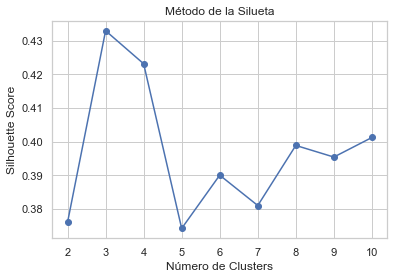

In [788]:
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(C)
    silhouette_avg = silhouette_score(C, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar el método de la silueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

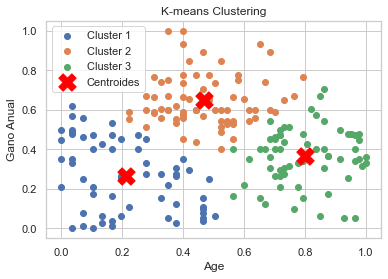

In [789]:
# Número de clusters que deseas
num_clusters = 3

# Inicializar el modelo K-means
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Ajustar el modelo a los datos
kmeans.fit_predict(C)


# Agregar las etiquetas de cluster al conjunto de datos original
data['Cluster'] = kmeans.labels_

# Visualización de los clusters
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Age')
plt.ylabel('Gano Anual')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### 3.2 Insights
El resultado del clustering revela la existencia de tres grupos. Tanto los individuos más jóvenes como los mayores presentan ingresos inferiores en comparación con aquellos en la categoría de mediana edad. Esta observación podría deberse al hecho de que las personas en la fase de mediana edad suelen experimentar salarios más favorables en comparación con las etapas más tempranas y tardías de la vida.

### 3.3 Validación

In [790]:
davies_bouldin = davies_bouldin_score(C, kmeans.labels_)
silhouette_avg = silhouette_score(C, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(C, kmeans.labels_)

print("Silhouette Score:", silhouette_avg, '\nDavies Bouldin:', davies_bouldin, '\nCalinski Harabasz:', calinski_harabasz )

Silhouette Score: 0.4330092089190245 
Davies Bouldin: 0.805615367984192 
Calinski Harabasz: 201.23274741327097


1. Silhouette Score: 0.4330
   - Sugiere una asignación moderada de los puntos a los clusters con una separación aceptable entre los clusters..

2. Davies-Bouldin Index: 0.8056
   -  Sugiere que la dispersión entre los clusters es moderada, pero podría haber margen para mejorar.

3. Calinski-Harabasz Index: 201.2327
   - Sugiere que la partición tiene una separación razonable entre los clusters.

Estas métricas indican un rendimiento razonable para del modelo de clustering.

### 4ª Segmentación genero y pontuación de gasto

### 4.1 Modelo

In [791]:
D = data[['Gender', 'Spending Score (1-100)']] 

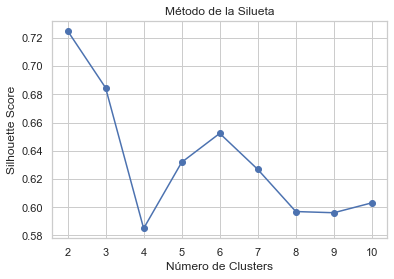

In [792]:
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(D)
    silhouette_avg = silhouette_score(D, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Graficar el método de la silueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

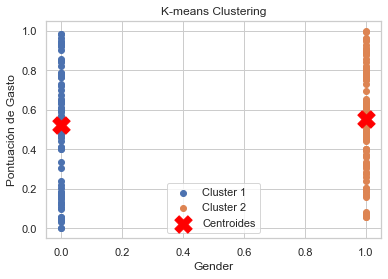

In [793]:
# Número de clusters que deseas
num_clusters = 2

# Inicializar el modelo K-means
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=0)

# Ajustar el modelo a los datos
kmeans.fit_predict(D)


# Agregar las etiquetas de cluster al conjunto de datos original
data['Cluster'] = kmeans.labels_

# Visualización de los clusters
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Gender'], cluster_data['Spending Score (1-100)'], label=f'Cluster {cluster + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Gender')
plt.ylabel('Pontuación de Gasto')
plt.title('K-means Clustering')
plt.legend()
plt.show()

### 4.2 Insights
En función de una visualización anterior, se observa que uno de los géneros gasta ligeramente más que el otro. En este caso, se ha identificado que los individuos del género femenino son aquellos que presentan un gasto ligeramente superior, según la información previamente analizada en otra representación gráfica.

### 4.3 Validación

In [794]:
davies_bouldin = davies_bouldin_score(D, kmeans.labels_)
silhouette_avg = silhouette_score(D, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(D, kmeans.labels_)

print("Silhouette Score:", silhouette_avg, '\nDavies Bouldin:', davies_bouldin, '\nCalinski Harabasz:', calinski_harabasz )

Silhouette Score: 0.725082021261951 
Davies Bouldin: 0.4186019090095532 
Calinski Harabasz: 740.9877708137828


1. Silhouette Score: 0.7251
   - Sugiere una buena asignación de los puntos a los clusters con una clara separación entre los clusters.

2. Davies-Bouldin Index: 0.4186
   - Sugiere que la dispersión entre los clusters es relativamente baja, lo cual es positivo.

3. Calinski-Harabasz Index: 740.9878
   - Sugiere que la partición tiene una buena separación entre los clusters.

En conjunto, estas métricas indican que el clustering parece ser de buena calidad. La alta puntuación en el Silhouette Score sugiere que los clusters están bien definidos y que hay una clara separación entre ellos. Además, el bajo valor en el índice Davies-Bouldin y el alto valor en el índice Calinski-Harabasz respaldan la idea de que los clusters están bien definidos y separados entre sí.